## QST SIMULATION

In [1]:
from pylab import *
from scipy.optimize import *
from toolbox import *

n_perp=10

Lvec=linspace(15,15,1)

Sopt_curved={}
Iopt_curved={}
Sopt_straight={}
Iopt_straight={}

for iterL in range(size(Lvec)):
    
    I = {}  ## PARAMETER DICTIONNARY
    I['N'] = 2 # node number (should be 2)
    I['nx'] = n_perp # atoms per node
    I['ny'] = n_perp  # atoms per node
    I['nz'] = 2 # atoms per node
    I['n'] = I['nx']*I['ny']*I['nz'] # atoms per node
    I['dx'] = 0.8 # atoms per node
    I['dy'] = 0.8 # atoms per node
    I['dz'] = 1-1./(2*2) # atoms per node
    I['lambda0']=1.
    I['L']=Lvec[iterL]+(I['nz']-1)*I['dz']/2 # distance from first atom to waist of gaussian mode
    I['gamma'] = 1. # decay rate of ensemble atoms
    I['Delta'] = -20. # Delta

    #Sopt_curved[iterL],Iopt_curved[iterL]=mySolver(I,1,1,0)
    Sopt_straight[iterL],Iopt_straight[iterL]=mySolver(I,1,0,1)

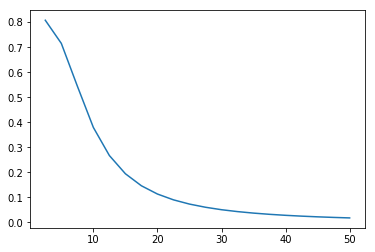

In [35]:
plt.plot(Lvec,myvec)
plt.show()

In [34]:
myvec=np.zeros((20))
for iterL in range(size(Lvec)):
    myvec[iterL]=abs(Sopt_straight[iterL]['gammaR'])**2/(2*imag(Sopt_straight[iterL]['selfE1'])*2*imag(Sopt_straight[iterL]['selfE2']))

## Display Electric Field

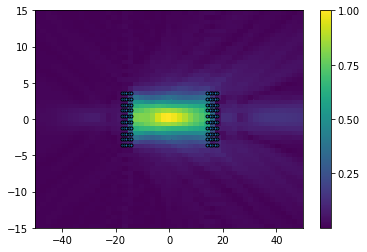

In [9]:
from cfigure import*
S=Sopt_straight[0]
I=Iopt_straight[0]

xmin=-15.
xmax=15.;
nbx=50;
zmin=-50.;
zmax=50;
nbz=50
y=0;

xPosy=zeros((I['nx'],I['nz']*I['N']))
zPosy=zeros((I['nx'],I['nz']*I['N']))

for iterx in range(I['nx']):
    for iterz in range(I['nz']*I['N']):
        xPosy[iterx,iterz]=xPos(I,iterz*I['nx']*I['ny']+I['nx']*(I['ny']/2)+iterx)
        zPosy[iterx,iterz]=zPos(I,iterz*I['nx']*I['ny']+I['nx']*(I['ny']/2)+iterx)
xPosflat=xPosy.reshape(I['nx']*I['nz']*I['N'])
zPosflat=zPosy.reshape(I['nx']*I['nz']*I['N'])

zvec=linspace(zmin,zmax,nbz);
xvec=linspace(xmin,xmax,nbx);
    
EF=zeros((nbz,nbx))+1j*zeros((nbz,nbx))
for iterz in range(nbz):
    for iterx in range(nbx):
        for itern in range(I['n']*I['N']):
            rdif=sqrt((y-yPos(I,itern))**2+(xvec[iterx]-xPos(I,itern))**2)
            zdif=zvec[iterz]-zPos(I,itern)
            EF[iterz,iterx]+=GreensTensor(I['lambda0'],rdif,zdif)*S['c'][itern]/I['lambda0']**2

x = np.linspace(xmin, xmax, nbx)
z = np.linspace(zmin, zmax, nbz)
X,Z = np.meshgrid(x,z)

#police = 60
#myfig = cfigure(100,15,police,0)
#ax = myfig.add_subplot(111)
#ax.set_xlabel("$z/\lambda_0$")
#ax.set_ylabel("$x/\lambda_0$",labelpad=-50)
plt.pcolormesh(Z,X, abs(EF)/np.max(abs(EF)))#,rasterized=True,cmap=cm.Reds,shading="gouraud",vmin=0.)
plt.colorbar(ticks=[0.,0.25,0.5,0.75,1.]) 
plot(zPosflat,xPosflat, '.',mec='k')
#ax.xaxis.set_major_locator(MultipleLocator(50))
#plot(-10.5,0, 'o',ms=20,mec='k',color=cm.viridis(0.99))
plt.show()
#myfig.savefig("EFfieldvoila.pdf",bbox_inches='tight')